In [2]:
import pandas as pd
csv_file_path = 'VA/census2021-ts066-ltla.csv'
df = pd.read_csv(csv_file_path)


In [17]:
import pandas as pd

data_family_composition = pd.read_csv('VA/census2021-ts003-ltla.csv')  # 家庭构成
data_density = pd.read_csv('VA/census2021-ts006-ltla.csv')  # 人口密度
# print(data_residents.columns)
# print(data_family_composition.columns)
# print(data_density.columns)
# 想查看列的目录，可以把 # 去掉

data_birth_country = pd.read_csv('VA/census2021-ts004-ltla.csv')  # 出生国与移民背景数据
data_year_of_arrival = pd.read_csv('VA/census2021-ts015-ltla.csv')  # 到达英国的年份
# print(data_birth_country.columns)
# print(data_year_of_arrival.columns)

data_education1 = pd.read_csv('VA/census2021-ts067-ltla.csv')  # 教育背景数据1
data_education2 = pd.read_csv('VA/census2021-ts068-ltla.csv')  # 教育背景数据2

# print(data_education1.columns)
# print(data_education2.columns)


In [18]:
import pandas as pd

#数据合并003,006
data_family_composition = pd.read_csv('VA/census2021-ts003-ltla.csv')
data_density = pd.read_csv('VA/census2021-ts006-ltla.csv')

family_cols = [
    'geography code', 
    'Household composition: One person household; measures: Value'
]

density_cols = [
    'geography code', 
    'Population Density: Persons per square kilometre; measures: Value'
]

data_merged = pd.merge(data_family_composition[family_cols], data_density[density_cols], on='geography code', how='left')


data_education1['higher_education_ratio'] = data_education1['Highest level of qualification: Level 4 qualifications and above'] / data_education1['Highest level of qualification: Total: All usual residents aged 16 years and over']
data_education2['student_ratio'] = data_education2['Schoolchild or full-time student indicator: Student'] / data_education2['Schoolchild or full-time student indicator: Total: All usual residents aged 5 years and over']
education_cols = ['geography code', 'higher_education_ratio', 'student_ratio']
data_merged1 = pd.merge(
    data_education1[['geography code', 'higher_education_ratio']], 
    data_education2[['geography code', 'student_ratio']], 
    on='geography code'
)

birth_country_cols = [
    'geography code',
    'Country of birth: Europe; measures: Value',
    'Country of birth: Middle East and Asia; measures: Value',
    'Country of birth: The Americas and the Caribbean; measures: Value'
]

data_merged2 = data_birth_country[birth_country_cols]

# Final merge to combine all data sets
data_final = pd.merge(pd.merge(data_merged, data_merged1, on='geography code', how='left'), data_merged2, on='geography code', how='left')
print(data_final.columns)


Index(['geography code',
       'Household composition: One person household; measures: Value',
       'Population Density: Persons per square kilometre; measures: Value',
       'higher_education_ratio', 'student_ratio',
       'Country of birth: Europe; measures: Value',
       'Country of birth: Middle East and Asia; measures: Value',
       'Country of birth: The Americas and the Caribbean; measures: Value'],
      dtype='object')


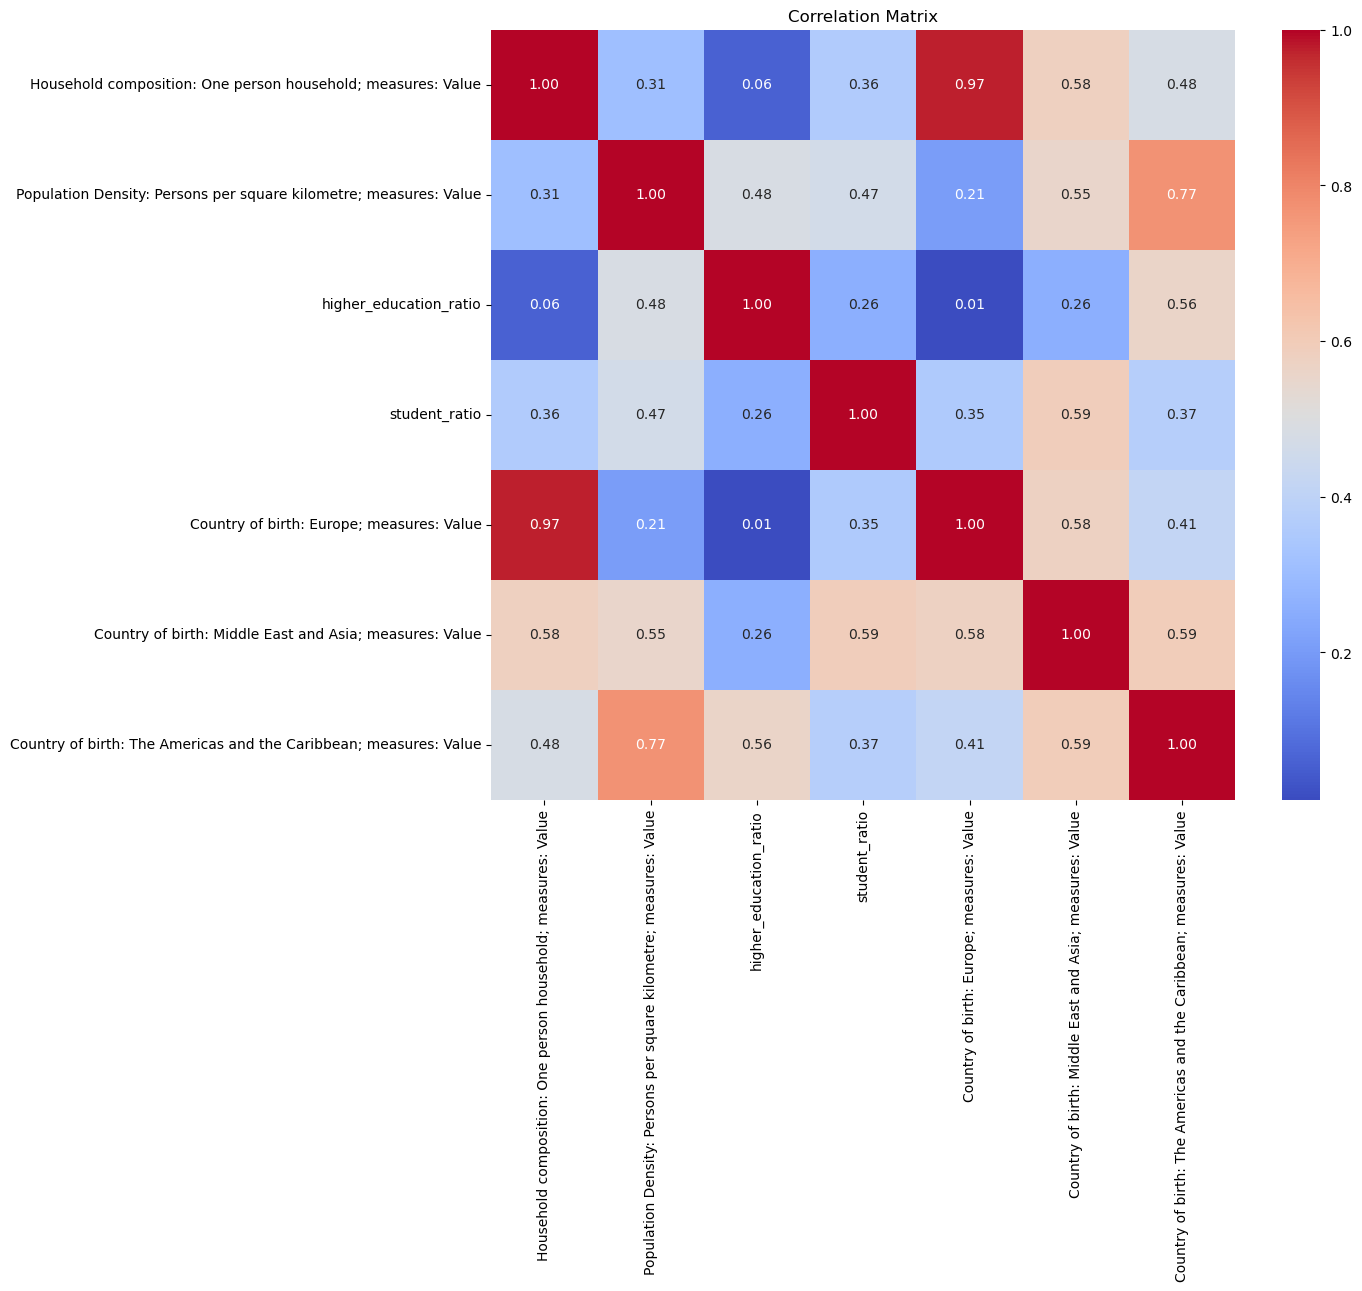

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_data = data_final.select_dtypes(include=[np.number])  # 选择数据框中的数值型列

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
eco_statues_cols = [
    'geography code',
    'Economic activity status: Economically active (excluding full-time students)',
    'Economic activity status: Economically active and a full-time student',
    'Economic activity status: Economically inactive'
]

data_merged3 = df[eco_statues_cols]
data_final = pd.merge(data_final, data_merged3, on='geography code', how='left')
print(data_final.columns)
data_final.to_csv('data_final.csv', index=False)



Index(['geography code',
       'Household composition: One person household; measures: Value',
       'Population Density: Persons per square kilometre; measures: Value',
       'higher_education_ratio', 'student_ratio',
       'Country of birth: Europe; measures: Value',
       'Country of birth: Middle East and Asia; measures: Value',
       'Country of birth: The Americas and the Caribbean; measures: Value',
       'Economic activity status: Economically active (excluding full-time students)',
       'Economic activity status: Economically active and a full-time student',
       'Economic activity status: Economically inactive'],
      dtype='object')


In [6]:
import pandas as pd

path_2011 = 'VA/2011economic.csv'
data2011 = pd.read_csv(path_2011, encoding='ISO-8859-1')
data2021 = df

# 从两个数据集中提取地理编码
geo_codes_2011 = set(data2011['Area code'].unique())
geo_codes_2021 = set(data2021['geography code'].unique())

# 找到两个数据集中都存在的地理编码
matching_geo_codes = geo_codes_2011.intersection(geo_codes_2021)

# 筛选只包含匹配地理编码的数据行
data2011_filtered = data2011[data2011['Area code'].isin(matching_geo_codes)]
data2021_filtered = data2021[data2021['geography code'].isin(matching_geo_codes)]

# 确定涉及学生经济活动的列名
columns_2011 = ['Area code', 'Economically active: Full-time student']
columns_2021 = ['geography code', 'Economic activity status: Economically active and a full-time student']

# 合并数据集
merged_data = pd.merge(data2011_filtered[columns_2011],
                       data2021_filtered[columns_2021],
                       left_on='Area code', right_on='geography code')

# 显示合并后的数据头部
print(merged_data.head())

# 如果需要，可以将合并后的数据保存到CSV文件
merged_data.to_csv('merged_2011_2021_data.csv', index=False)


   Area code Economically active: Full-time student geography code  \
0  E06000047                                 10,262      E06000047   
1  E06000005                                  1,954      E06000005   
2  E06000001                                  1,787      E06000001   
3  E06000002                                  4,416      E06000002   
4  E06000003                                  2,439      E06000003   

   Economic activity status: Economically active and a full-time student  
0                                               8263                      
1                                               1561                      
2                                               1264                      
3                                               4015                      
4                                               1817                      
